In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os
import seaborn as sns
from statannot import add_stat_annotation
import glob
from scipy import stats

# Notebook to plot distance of mature cells at E18.5 to the border of the tissue and to vessels
# (relative to Figure S5)

# Load data progenitors / Normalization to random

In [17]:
All_data = pandas.read_csv('Z:\Marcia_Valentin\All\Data_and_code_paper\Data_Github\Data_figures/Distance_to_border_mature_E18.csv')

In [19]:
CD45_distance_border_random = All_data.loc[(All_data.cell_type == 'CD45+') & (All_data.type == 'random_data')]
CD45_distance_border = All_data.loc[(All_data.cell_type == 'CD45+') & (All_data.type == 'observed_data')]

B220_distance_border_random = All_data.loc[(All_data.cell_type == 'B220+') & (All_data.type == 'random_data')]
B220_distance_border = All_data.loc[(All_data.cell_type == 'B220+') & (All_data.type == 'observed_data')]

CD11b_distance_border_random = All_data.loc[(All_data.cell_type == 'CD11b+') & (All_data.type == 'random_data')]
CD11b_distance_border = All_data.loc[(All_data.cell_type == 'CD11b+') & (All_data.type == 'observed_data')]

In [36]:
# CD45+ cells
CD45_distance_border_random_normalized_E18 = pandas.DataFrame()
CD45_distance_border_normalized_E18 = pandas.DataFrame()

for date in CD45_distance_border.date.unique():
    random_basis = CD45_distance_border_random.loc[CD45_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = CD45_distance_border.loc[CD45_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    CD45_distance_border_random_normalized_E18 = pandas.concat([CD45_distance_border_random_normalized_E18, random_basis]).reset_index(drop=True)
    CD45_distance_border_normalized_E18 = pandas.concat([CD45_distance_border_normalized_E18, observed_data]).reset_index(drop=True)

CD45_distance_border_normalized_E18['type'] = 'E18.5'
CD45_distance_border_random_normalized_E18['type'] = 'random'
CD45_distance_border_E18 = pandas.concat([CD45_distance_border_normalized_E18, CD45_distance_border_random_normalized_E18]).reset_index(drop=True)

# CD45+ B220+ cells
B220_distance_border_random_normalized_E18 = pandas.DataFrame()
B220_distance_border_normalized_E18 = pandas.DataFrame()

for date in B220_distance_border.date.unique():
    random_basis = B220_distance_border_random.loc[B220_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = B220_distance_border.loc[B220_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    B220_distance_border_random_normalized_E18 = pandas.concat([B220_distance_border_random_normalized_E18, random_basis]).reset_index(drop=True)
    B220_distance_border_normalized_E18 = pandas.concat([B220_distance_border_normalized_E18, observed_data]).reset_index(drop=True)

B220_distance_border_normalized_E18['type'] = 'E18.5'
B220_distance_border_random_normalized_E18['type'] = 'random'
B220_distance_border_E18 = pandas.concat([B220_distance_border_normalized_E18, B220_distance_border_random_normalized_E18]).reset_index(drop=True)

# CD45+ CD11b+ cells
CD11b_distance_border_random_normalized_E18 = pandas.DataFrame()
CD11b_distance_border_normalized_E18 = pandas.DataFrame()

for date in CD11b_distance_border.date.unique():
    random_basis = CD11b_distance_border_random.loc[CD11b_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = CD11b_distance_border.loc[CD11b_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    CD11b_distance_border_random_normalized_E18 = pandas.concat([CD11b_distance_border_random_normalized_E18, random_basis]).reset_index(drop=True)
    CD11b_distance_border_normalized_E18 = pandas.concat([CD11b_distance_border_normalized_E18, observed_data]).reset_index(drop=True)

CD11b_distance_border_normalized_E18['type'] = 'E18.5'
CD11b_distance_border_random_normalized_E18['type'] = 'random'
CD11b_distance_border_E18 = pandas.concat([CD11b_distance_border_normalized_E18, CD11b_distance_border_random_normalized_E18]).reset_index(drop=True)

C:\Users\vabonnet\AppData\Local\Temp\ipykernel_15876\206930844.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  random_basis = CD45_distance_border_random.loc[CD45_distance_border_random.date == date].groupby(['r']).mean().reset_index()
C:\Users\vabonnet\AppData\Local\Temp\ipykernel_15876\206930844.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  random_basis = CD45_distance_border_random.loc[CD45_distance_border_random.date == date].groupby(['r']).mean().reset_index()
C:\Users\vabonnet\AppData\Local\Temp\ipykernel_15876\206930844.py:6: FutureWarning: The default value of numeric_only in DataFrameGrou

# Plots mature cells distance to border

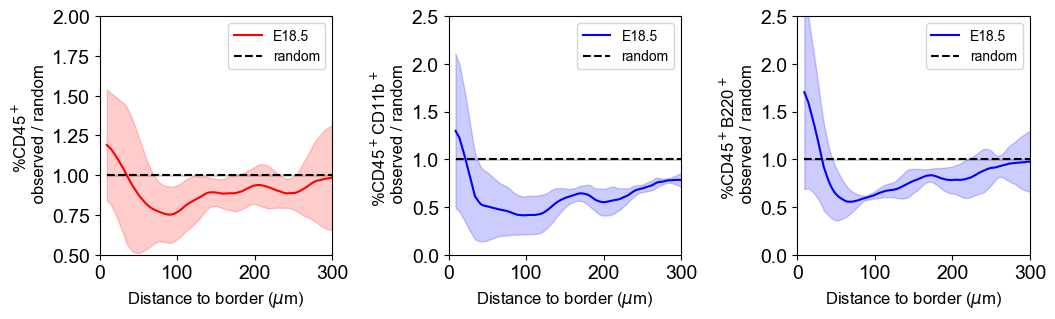

In [37]:
plt.rc('font',family='Arial')

fig = plt.figure(figsize=(12, 3.1))

gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[2, 2, 2], wspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax1,
             data = CD45_distance_border_E18.loc[CD45_distance_border_E18.type == 'E18.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E18.5',
             color = 'red')

sns.lineplot(ax = ax1,
             data = CD45_distance_border_E18.loc[CD45_distance_border_E18.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax1.set_ylabel('%CD45$^+$ \n observed / random', fontsize = 12, c = 'k')
ax1.set_xlabel('Distance to border ($\mu$m)', fontsize = 12)
ax1.set_ylim(0.5,2)
ax1.set_xlim(0,300)

ax2 = fig.add_subplot(gs[0, 1])
ax2.tick_params(axis='y', labelsize=14, colors='k')
ax2.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax2,
             data = CD11b_distance_border_E18.loc[CD11b_distance_border_E18.type == 'E18.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E18.5',
             color = 'blue')

sns.lineplot(ax = ax2,
             data = CD11b_distance_border_E18.loc[CD11b_distance_border_E18.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax2.set_ylabel('%CD45$^+$CD11b$^+$ \n observed / random', fontsize = 12, c = 'k')
ax2.set_xlabel('Distance to border ($\mu$m)', fontsize = 12)
ax2.set_ylim(0,2.5)
ax2.set_xlim(0,300)

ax3 = fig.add_subplot(gs[0, 2])
ax3.tick_params(axis='y', labelsize=14, colors='k')
ax3.tick_params(axis='x', labelsize=14, colors='black')
sns.lineplot(ax = ax3,
             data = B220_distance_border_E18.loc[B220_distance_border_E18.type == 'E18.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E18.5',
             color = 'blue')

sns.lineplot(ax = ax3,
             data = B220_distance_border_E18.loc[B220_distance_border_E18.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax3.set_ylabel('%CD45$^+$B220$^+$ \n observed / random', fontsize = 12, c = 'k')
ax3.set_xlabel('Distance to border ($\mu$m)', fontsize = 12)
ax3.set_ylim(0,2.5)
ax3.set_xlim(0,300)

plt.show()

# Load data progenitors / Normalization to random

In [27]:
All_data = pandas.read_csv('Z:\Marcia_Valentin\All\Data_and_code_paper\Data_Github\Data_figures/Distance_to_vessels_mature_E18.csv')

In [28]:
CD45_distance_vessels_random = All_data.loc[(All_data.cell_type == 'CD45+') & (All_data.type == 'random_data')]
CD45_distance_vessels = All_data.loc[(All_data.cell_type == 'CD45+') & (All_data.type == 'observed_data')]

B220_distance_vessels_random = All_data.loc[(All_data.cell_type == 'B220+') & (All_data.type == 'random_data')]
B220_distance_vessels = All_data.loc[(All_data.cell_type == 'B220+') & (All_data.type == 'observed_data')]

CD11b_distance_vessels_random = All_data.loc[(All_data.cell_type == 'CD11b+') & (All_data.type == 'random_data')]
CD11b_distance_vessels = All_data.loc[(All_data.cell_type == 'CD11b+') & (All_data.type == 'observed_data')]

In [ ]:
# CD45+ cells
CD45_distance_vessels_random_normalized_E18 = pandas.DataFrame()
CD45_distance_vessels_normalized_E18 = pandas.DataFrame()

for date in CD45_distance_vessels.date.unique():
    random_basis = CD45_distance_vessels_random.loc[CD45_distance_vessels_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = CD45_distance_vessels.loc[CD45_distance_vessels.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    CD45_distance_vessels_random_normalized_E18 = pandas.concat([CD45_distance_vessels_random_normalized_E18, random_basis]).reset_index(drop=True)
    CD45_distance_vessels_normalized_E18 = pandas.concat([CD45_distance_vessels_normalized_E18, observed_data]).reset_index(drop=True)

CD45_distance_vessels_normalized_E18['type'] = 'E18.5'
CD45_distance_vessels_random_normalized_E18['type'] = 'random'
CD45_distance_vessels_E18 = pandas.concat([CD45_distance_vessels_normalized_E18, CD45_distance_vessels_random_normalized_E18]).reset_index(drop=True)

# CD45+ B220+ cells
B220_distance_vessels_random_normalized_E18 = pandas.DataFrame()
B220_distance_vessels_normalized_E18 = pandas.DataFrame()

for date in B220_distance_vessels.date.unique():
    random_basis = B220_distance_vessels_random.loc[B220_distance_vessels_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = B220_distance_vessels.loc[B220_distance_vessels.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    B220_distance_vessels_random_normalized_E18 = pandas.concat([B220_distance_vessels_random_normalized_E18, random_basis]).reset_index(drop=True)
    B220_distance_vessels_normalized_E18 = pandas.concat([B220_distance_vessels_normalized_E18, observed_data]).reset_index(drop=True)

B220_distance_vessels_normalized_E18['type'] = 'E18.5'
B220_distance_vessels_random_normalized_E18['type'] = 'random'
B220_distance_vessels_E18 = pandas.concat([B220_distance_vessels_normalized_E18, B220_distance_vessels_random_normalized_E18]).reset_index(drop=True)

# CD45+ CD11b+ cells
CD11b_distance_vessels_random_normalized_E18 = pandas.DataFrame()
CD11b_distance_vessels_normalized_E18 = pandas.DataFrame()

for date in CD11b_distance_vessels.date.unique():
    random_basis = CD11b_distance_vessels_random.loc[CD11b_distance_vessels_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = CD11b_distance_vessels.loc[CD11b_distance_vessels.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    CD11b_distance_vessels_random_normalized_E18 = pandas.concat([CD11b_distance_vessels_random_normalized_E18, random_basis]).reset_index(drop=True)
    CD11b_distance_vessels_normalized_E18 = pandas.concat([CD11b_distance_vessels_normalized_E18, observed_data]).reset_index(drop=True)

CD11b_distance_vessels_normalized_E18['type'] = 'E18.5'
CD11b_distance_vessels_random_normalized_E18['type'] = 'random'
CD11b_distance_vessels_E18 = pandas.concat([CD11b_distance_vessels_normalized_E18, CD11b_distance_vessels_random_normalized_E18]).reset_index(drop=True)

# Plots mature cells distance to border

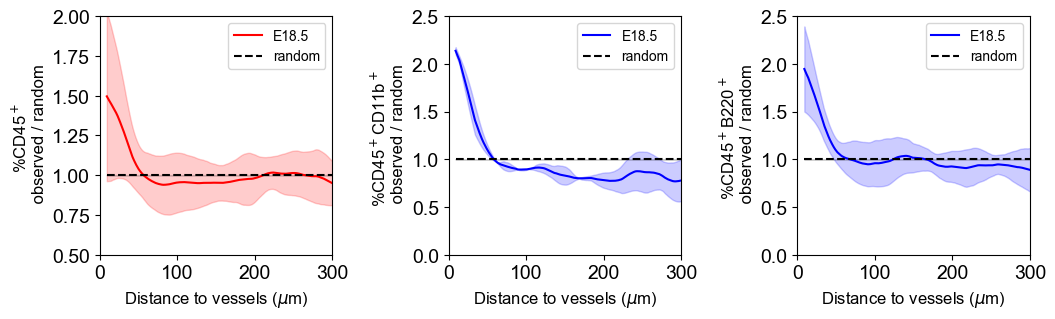

In [39]:
plt.rc('font',family='Arial')

fig = plt.figure(figsize=(12, 3.1))

gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[2, 2, 2], wspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax1,
             data = CD45_distance_vessels_E18.loc[CD45_distance_vessels_E18.type == 'E18.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E18.5',
             color = 'red')

sns.lineplot(ax = ax1,
             data = CD45_distance_vessels_E18.loc[CD45_distance_vessels_E18.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax1.set_ylabel('%CD45$^+$ \n observed / random', fontsize = 12, c = 'k')
ax1.set_xlabel('Distance to vessels ($\mu$m)', fontsize = 12)
ax1.set_ylim(0.5,2)
ax1.set_xlim(0,300)

ax2 = fig.add_subplot(gs[0, 1])
ax2.tick_params(axis='y', labelsize=14, colors='k')
ax2.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax2,
             data = CD11b_distance_vessels_E18.loc[CD11b_distance_vessels_E18.type == 'E18.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E18.5',
             color = 'blue')

sns.lineplot(ax = ax2,
             data = CD11b_distance_vessels_E18.loc[CD11b_distance_vessels_E18.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax2.set_ylabel('%CD45$^+$CD11b$^+$ \n observed / random', fontsize = 12, c = 'k')
ax2.set_xlabel('Distance to vessels ($\mu$m)', fontsize = 12)
ax2.set_ylim(0,2.5)
ax2.set_xlim(0,300)

ax3 = fig.add_subplot(gs[0, 2])
ax3.tick_params(axis='y', labelsize=14, colors='k')
ax3.tick_params(axis='x', labelsize=14, colors='black')
sns.lineplot(ax = ax3,
             data = B220_distance_vessels_E18.loc[B220_distance_vessels_E18.type == 'E18.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E18.5',
             color = 'blue')

sns.lineplot(ax = ax3,
             data = B220_distance_vessels_E18.loc[B220_distance_vessels_E18.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax3.set_ylabel('%CD45$^+$B220$^+$ \n observed / random', fontsize = 12, c = 'k')
ax3.set_xlabel('Distance to vessels ($\mu$m)', fontsize = 12)
ax3.set_ylim(0,2.5)
ax3.set_xlim(0,300)

plt.show()